In [1]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.formula.api import ols
from statsmodels.stats.diagnostic import het_white
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('Study2aLinearRegressionData.csv')

In [3]:
data = data.dropna()
data.describe()

,Subject,Gender,Age,Trait Anxiety,WTPabsmarketchange,WTPsignedmarketchange,vWTP
count,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000
mean,21.500000,0.642857,28.023810,42.214286,1.581229,1.228904,3.185740
std,12.267844,0.484966,11.614726,11.688092,2.960102,3.658151,16.310107
min,1.000000,0.000000,18.000000,20.000000,-5.010004,-6.731471,-72.765000
25%,11.250000,0.000000,21.000000,35.000000,-0.023476,-0.284264,0.067235
50%,21.500000,1.000000,23.500000,39.500000,0.348852,0.218364,0.900119
75%,31.750000,1.000000,30.750000,51.000000,2.852352,1.324775,7.272843
max,42.000000,1.000000,66.000000,68.000000,10.873688,15.388281,47.641414


In [4]:
for key in data.keys():
    print(key,"length of unique values:",len(set(data[key].tolist())))

Subject length of unique values: 42
Gender length of unique values: 2
Age length of unique values: 21
Trait Anxiety length of unique values: 30
WTPabsmarketchange length of unique values: 42
WTPsignedmarketchange length of unique values: 42
vWTP length of unique values: 42


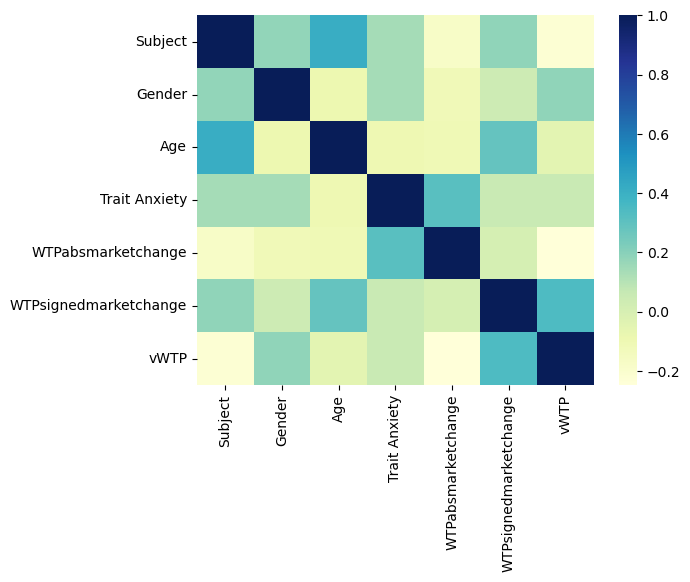

In [5]:
dataplot = sns.heatmap(data.corr(),cmap="YlGnBu")
plt.show()

In [6]:
X=data
Y=data["WTPabsmarketchange"]
X = X.drop(['WTPabsmarketchange',"WTPsignedmarketchange","vWTP"], axis=1)

In [7]:
vif_info = pd.DataFrame()
vif_info['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_info['Column'] = X.columns
vif_info.sort_values('VIF', ascending=False)

,VIF,Column
3,6.268014,Trait Anxiety
2,6.230957,Age
0,5.444430,Subject
1,2.866686,Gender


In [8]:
for f in X.columns:
    X[f] = (X[f] - X[f].mean()) / X[f].std()

WTPabsmarketchange = β0 + β1* Trait Anxiety score + β2*Age + β3*Gender 

In [9]:
x = sm.add_constant(X)
multi_model1 = sm.OLS(Y, x).fit()
print(multi_model1.summary())

                            OLS Regression Results                            
Dep. Variable:     WTPabsmarketchange   R-squared:                       0.164
Model:                            OLS   Adj. R-squared:                  0.073
Method:                 Least Squares   F-statistic:                     1.810
Date:                Sat, 06 May 2023   Prob (F-statistic):              0.148
Time:                        12:11:42   Log-Likelihood:                -100.92
No. Observations:                  42   AIC:                             211.8
Df Residuals:                      37   BIC:                             220.5
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             1.5812      0.440      3.596

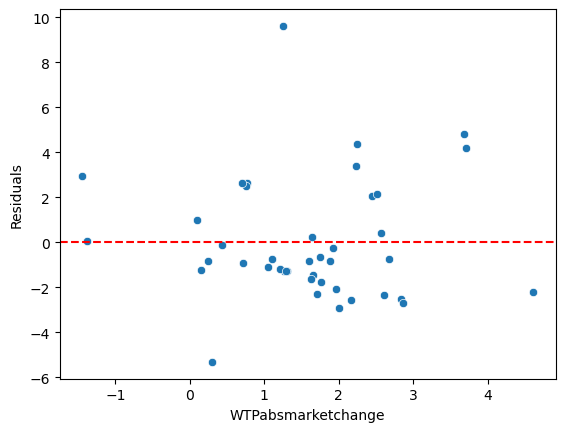

In [10]:
sns.scatterplot(x=multi_model1.fittedvalues, y=multi_model1.resid)

# Add a horizontal line at y=0
plt.axhline(y=0, color='r', linestyle='--')

# Add axis labels
plt.xlabel('WTPabsmarketchange')
plt.ylabel('Residuals')

# Show the plot
plt.show()

Q-Q Plot

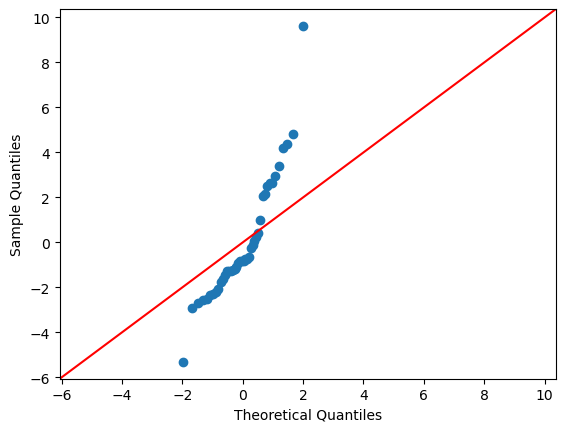

In [11]:
fig = sm.qqplot(multi_model1.resid, line='45')
plt.show()

In [12]:
white_test = het_white(multi_model1.resid,  multi_model1.model.exog)
labels = ["Test Statistic", "Test p-value", "F-Statistic", "F-Test p-value"]
print(dict(zip(labels, white_test)))

{'Test Statistic': 27.76654262345795, 'Test p-value': 0.009752890017618344, 'F-Statistic': 4.201710059124757, 'F-Test p-value': 0.0007100926784392762}


White’s test uses the following null and alternative hypotheses:

    Null (H0): Homoscedasticity is present (residuals are equally scattered)
    Alternative (HA): Heteroscedasticity is present (residuals are not equally scattered)

Here p value is 0.009, which is less than 0.05. 